In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import shutil
import glob

import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16 
from keras.layers import AveragePooling2D
from keras.layers import Dropout
from keras.layers import Input
from keras.models import Model
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
from tensorflow.keras.utils import plot_model
import shutil
import random
import cv2
import argparse
import os
# from tensorflow import *

In [ ]:
 glob.glob('/covid_19/thermo_image_dataset/train/*/*')

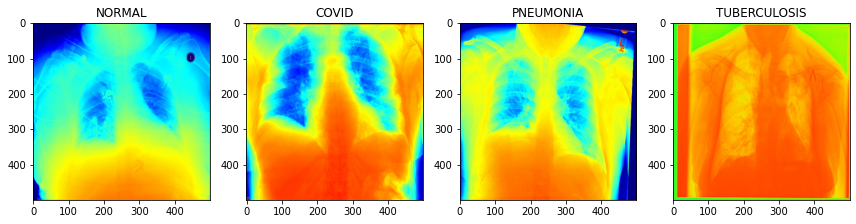

In [ ]:
img_normal = plt.imread('covid_19/thermo_image_dataset/train/normal/image_1.jpg')
img_normal= cv2.r
img_covid= plt.imread('covid_19/thermo_image_dataset/train/covid19/image_1.jpg')
img_penumonia_virus = plt.imread('covid_19/thermo_image_dataset/train/pneumonia/image_1.jpg')
img_tuber_virus=plt.imread("covid_19/final/demo_dataset_thermo/3/imgonline-com-ua-thermal0ZshkLOJbgwe.jpg")
 
plt.figure(figsize=(12, 5))
 
plt.subplot(1,4,1).set_title('NORMAL')
plt.imshow(img_normal, cmap='gray')
 
plt.subplot(1,4,2).set_title('COVID')
plt.imshow(img_covid, cmap='gray')
 
plt.subplot(1,4,3).set_title('PNEUMONIA')
plt.imshow(img_penumonia_virus, cmap='gray')

plt.subplot(1,4,4).set_title('TUBERCULOSIS')
plt.imshow(img_tuber_virus, cmap='gray')
 
plt.tight_layout()


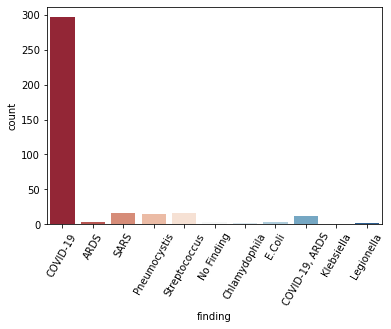

In [ ]:

eda = pd.read_csv('covid_19/metadata.csv')
sns.countplot(x = 'finding', data = eda, palette = 'RdBu')
plt.xticks(rotation=60)
plt.show()

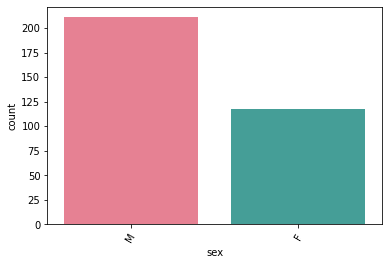

In [ ]:
sns.countplot(x = 'sex', data = eda, palette = 'husl')
plt.xticks(rotation=60)
plt.show()

In [ ]:


# set the matplotlib backend so figures can be saved in the background
import matplotlib
matplotlib.use("Agg")

# import the necessary packages
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.utils.np_utils import to_categorical
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os


EPOCHS = 100
INIT_LR = 1e-3
BS = 32

print("[INFO] loading images...")
data = []
labels = []
imagePaths = sorted(list(paths.list_images('covid_19/final/demo_dataset_thermo')))
random.seed(42)
random.shuffle(imagePaths)

# loop over the input images
for imagePath in imagePaths:
  image = cv2.imread(imagePath)
  image = cv2.resize(image, (28, 28))
  image = img_to_array(image)
  data.append(image)
  label = imagePath.split(os.path.sep)[-2]

  #############################
  if label=="covid":
    label= 0
        
  elif label=="normal":
    label= 1
        
  elif label=="pneumonia":
    label=2

  elif label=="tuberculosis":
    label=3    
  labels.append(label)


############################






[INFO] loading images...


In [ ]:
print(labels[1])

3


In [ ]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
 
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=42)

# convert the labels from integers to vectors
trainY = to_categorical(trainY, num_classes=4)
testY = to_categorical(testY, num_classes=4)

# # construct the image generator for data augmentation
# aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
# 	height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
# 	horizontal_flip=True, fill_mode="nearest")


In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.layers.normalization import BatchNormalization
from keras.layers import GlobalAveragePooling2D
img_height = 224
img_width = 224
img_channels = 3
img_dim = (img_height, img_width, img_channels) 
 
def inceptionv3(img_dim=img_dim):
    input_tensor1 = Input(shape=img_dim)
    base_model1 = InceptionV3(include_top=False,
                   weights='imagenet',
                   input_shape=img_dim)
    bn1 = BatchNormalization()(input_tensor1)
    x1 = base_model1(bn1)
    x1 = GlobalAveragePooling2D()(x1)
    x1 = Dropout(0.5)(x1)
    output1 = Dense(4, activation='sigmoid')(x1)
    base_model1 = Model(input_tensor1, output1)
    return base_model1
base_model1 = inceptionv3()
base_model1.summary()

87924736/87910968 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
batch_normalization_94 (Batc (None, 224, 224, 3)       12        
_________________________________________________________________
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 4)                 8196      
Total params: 21,810,992
Trainable params: 21,776,554
Non-trai

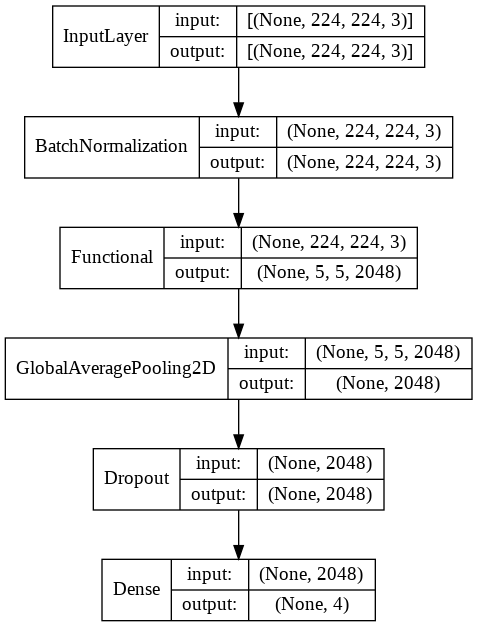

In [ ]:
plot_model(base_model1, to_file="function_inceptionv3.png",show_layer_names=False, show_shapes=True)

In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras import Model, layers

img_height = 224
img_width = 224
img_channels = 3
img_dim = (img_height, img_width, img_channels) 
 
def resnet(img_dim=img_dim):
  conv_base = ResNet50(
      include_top=False,
      weights='imagenet')

  for layer in conv_base.layers:
      layer.trainable = False

  x = conv_base.output
  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Dense(128, activation='relu')(x) 
  predictions = layers.Dense(4, activation='softmax')(x)
  return x
x = ResNet50()
x.summary()

102973440/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
________________________

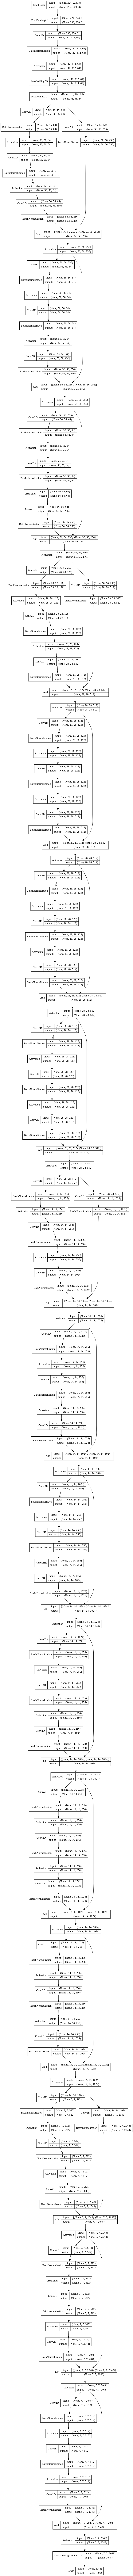

In [ ]:
plot_model(x, to_file="function_resnet.png",show_layer_names=False, show_shapes=True)

In [ ]:
from keras.applications.vgg16 import VGG16

Vgg_model=Sequential()
vgg16_model=keras.applications.vgg16.VGG16(include_top=False,input_shape=(64,64,3))
vgg16_model.summary()

classes = 4
model = Sequential()
inputShape = (28,28,3)

# if we are using "channels first", update the input shape
if K.image_data_format() == "channels_first":
  inputShape = (depth, height, width)

# first set of CONV => RELU => POOL layers
model.add(Conv2D(20, (5, 5), padding="same",
  input_shape=inputShape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# second set of CONV => RELU => POOL layers
model.add(Conv2D(50, (5, 5), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# first (and only) set of FC => RELU layers
model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))

# softmax classifier
model.add(Dense(classes))
model.add(Activation("softmax"))

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

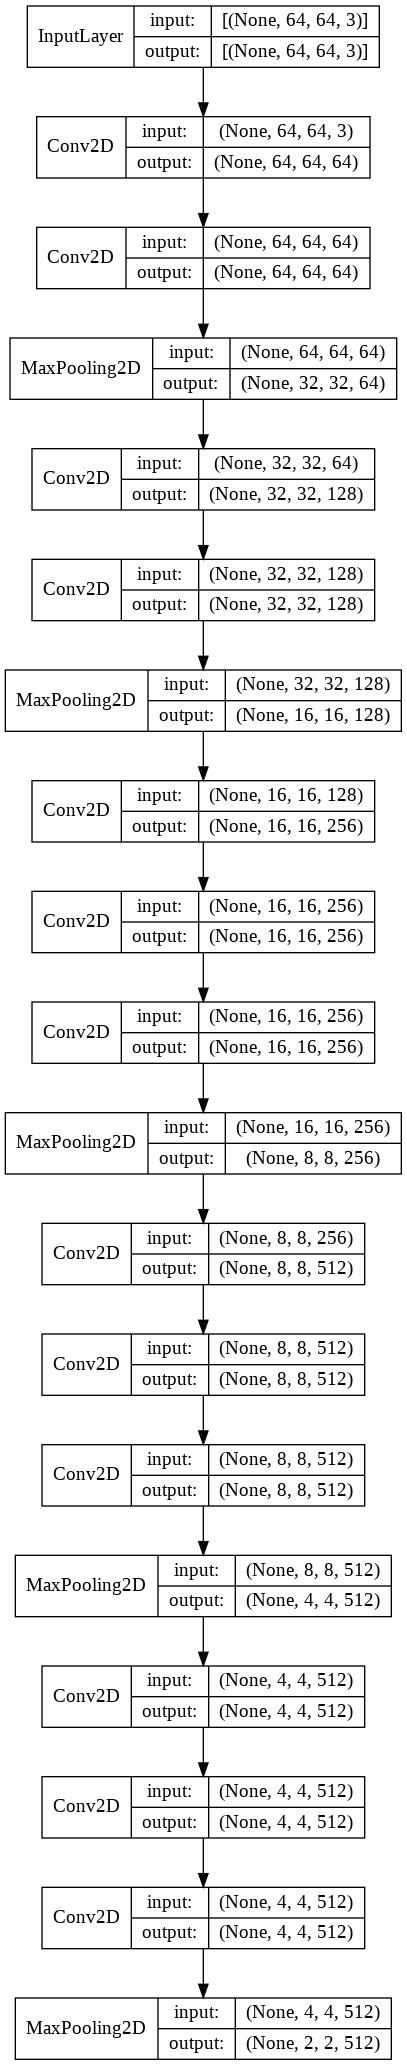

In [ ]:
plot_model(vgg16_model, to_file="function_resnet.png",show_layer_names=False, show_shapes=True)

In [ ]:
modelout = []
modelout.append(inceptionv3())
modelout.append(ResNet50())
modelout.append(VGG16())
def ensemble():
  prediction1 = model[0].predict(testY)
  prediction2 = model[1].predict(testY)
  prediction3 = model[2].predict(testY)
  stacked_arrays = np.hstack((prediction1,prediction2,prediction3)) 
  predictions =np.mean(stacked_arrays, axis=1)
  modelout = model
  return model

553476096/553467096 [==============================] - 4s 0us/step


''' ENSEMBLE LEARNING  is the process by which multiple models, such as classifiers or experts, 
are strategically generated and combined to solve a particular computational intelligence problem'''

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(trainX)



In [ ]:
H = model.fit_generator(datagen.flow(trainX, trainY, batch_size=BS),
	validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,
	epochs=EPOCHS, verbose=1)


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
3/3 [==============================] - 17s 503ms/step - loss: 1.4237 - accuracy: 0.2516 - val_loss: 1.3486 - val_accuracy: 0.3684
Epoch 2/100
3/3 [==============================] - 0s 104ms/step - loss: 1.3169 - accuracy: 0.5052 - val_loss: 1.2869 - val_accuracy: 0.3684
Epoch 3/100
3/3 [==============================] - 0s 93ms/step - loss: 1.2654 - accuracy: 0.5281 - val_loss: 1.2433 - val_accuracy: 0.3947
Epoch 4/100
3/3 [==============================] - 0s 102ms/step - loss: 1.2113 - accuracy: 0.4885 - val_loss: 1.2046 - val_accuracy: 0.3684
Epoch 5/100
3/3 [==============================] - 0s 101ms/step - loss: 1.1821 - accuracy: 0.4490 - val_loss: 1.1615 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 107ms/step - loss: 1.1373 - accuracy: 0.5531 - val_loss: 1.1200 - val_accuracy: 0.4737
Epoch 7/100
3/3 [==============================] - 0s 101ms/step - loss: 1.0752 - accuracy: 0.6000 - val_loss: 1.0947 - val_accuracy: 0.4211
Epoch 8/100
3

In [ ]:
# save the model to disk
print("[INFO] serializing network...")
model.save('thermo_cnn_modified.h5')

[INFO] serializing network...
